# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for white-sounding names
print('Total number of white-sounding names called back: ', sum(data[data.race=='w'].call))
print('Total number of black-sounding names called back: ', sum(data[data.race=='b'].call))

Total number of white-sounding names called back:  235.0
Total number of black-sounding names called back:  157.0


In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

* Z test will be the most appropriate statistical testing method as the size of the data is greater than 30.
* The Null Hypothesis (Ho) states there is a relationship between race and call for a job offer.
* Meaning there is racial discrimination in the US Job market.
* The Alternative Hypothesis (Ha) is that there is no relationship between race and being called for a job offer.
* Meaning all job applicants are given equal opportunities

In [5]:
whites = data[data.race=='w'].call[:100]
blacks = data[data.race=='b'].call[:100]

b_mean = blacks.mean()
print("Mean of black callbacks ", "%.3f" %(b_mean))
w_mean = whites.mean()
print("Mean of white callbacks ", "%.3f" %(w_mean))
data.groupby(['race','call']).count()
total_mean = (b_mean + w_mean)/2
print('Mean of the two means ', "%0.3f" %(total_mean))
w_std = whites.std()
print("Std of white callbacks ", "%.3f" %(w_std))
b_std = blacks.std()
print("Std of black callbacks ", "%.3f" %(b_std))

Mean of black callbacks  0.030
Mean of white callbacks  0.060
Mean of the two means  0.045
Std of white callbacks  0.239
Std of black callbacks  0.171


In [6]:
# Using the Bootstrap hypothesis test method.
# Margin of error
# To calculate Margin of error, Z value, population standard deviation and the sample size are all needed.
# To calculate the z value:
# calculating the mean of callbacks
mean = data['call'].mean()
print('Mean of callbacks is ', "{0:.4f}".format(mean))    

# Ho: each mean is <> 0.08 meaning there is discrimination
# Ha: both mean is 0.08 equal chances of being called back

# subtract this mean from each call value and add the null hypothesis value
data['mean subtract'] = data['call'] - mean + 0.08
mean2 = data['mean subtract'].mean()
print('The new mean is ', "%0.4f" %(mean2))


Mean of callbacks is  0.0805
The new mean is  0.0800


mean of replicates is 0.080
Standard deviation of replicates is 0.004


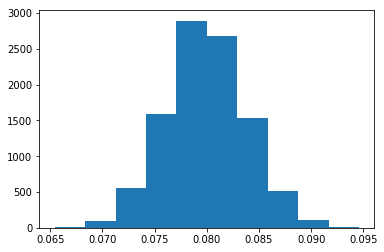

In [7]:
# select 10000 observations at random from sample size
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replicate function 
def draw_bs_reps(data, func, size=1):
    # bs_replicates an array of replicates
    bs_replicates = np.empty(size)

    # loop to generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# Take bootstrap replicates of call translated impact 
bs_replicates = draw_bs_reps(data['mean subtract'], np.mean, 10000)
plt.hist(bs_replicates)
print('mean of replicates is', "{0:.3f}".format(bs_replicates.mean()))    
print('Standard deviation of replicates is', "{0:.3f}".format(bs_replicates.std())) 

In [8]:
# Compute fraction of replicates that are less than the 
p = np.sum(bs_replicates <= np.mean(bs_replicates)) / 10000

# Print the p-value
print('p_value= ', "%0.4f" % (p))
# Since this p value > 0.05, I therefore fail to reject the null hypothesis.

p_value=  0.4946


In [9]:
# To calculate the z test for two samples
b_mean = 0.030
w_mean = 0.060
b_std = 0.171
w_std = 0.239
mean_diff = 0.032
b = 100
w = 100
# calculate Standard Error 
SE = math.sqrt((b_std**2/2278) + (w_std**2/2200))
print('Standard error is', "%.4f" %(SE))
#calculate z value
z_value = (w_mean - b_mean - mean_diff) / SE
print('Z_score is ', "%.4f" %(z_value))
# from the z table, considering confidence value of 95%, gives 0.0199
print('Z value with confidence value of 98% from the z table is', 0.3745)
# since the z score is negative, this shows that the mean of these two samples cabe 98% lesser than the population mean.

Standard error is 0.0062
Z_score is  -0.3211
Z value with confidence value of 98% from the z table is 0.3745


In [10]:
# confidence interval
z_score = 0.3745
pop_mean = 0.0805
pop_std = data['call'].std()
n = 4870
CI_1 = pop_mean - (z_score * pop_std/math.sqrt(4870))
CI_2 = pop_mean + (z_score * pop_std/math.sqrt(4870))
print('Confidence Interval is ', "%0.3f" %(CI_1), ':', "%0.3f" %(CI_2))
# this interval is from 79% confidence to 82%

Confidence Interval is  0.079 : 0.082


In [11]:
# margin of error
ME = z_score * pop_std/math.sqrt(4870)
print('Margin of error is ', "%.4f" %(ME))

Margin of error is  0.0015


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

* From this analysis above, for a job applicant to be called back after a job application, white-sounding names have a higher chance of being called for an offer.
* This analysis shows that from 4870 job applicants, 392 were called back.
* From this 392, 235(60%) of the callbacks were white-sounding names and the remaining 157(40%) went to the black-sounding names. With these results, the ratio of white to black is therefore 3:2
* This therefore was proven by the statistical analysis shown by the p value which when > 0.05, I therefore fail to reject the null hypothesis.
* And since the null hypothesis was defined as there is a relationship between race and call, this therfore means there is racial discrimination in the recruitment process

* Since the total mean of all callbacks is 0.08, the mean of a call back when it's a white-sounding name added to mean of black-sounding names is also 0.08.
* This therefore shows that race has a greater role to play if an applicant will be called back or not since it is always considered coupled with other features.
* This therefore means most of the call backs, the race is alwways amongst the main features considered before a call back.